# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.152349e+01     6.159518e+00
 * time: 0.0050580501556396484
     1     2.932685e+01     4.704054e+00
 * time: 0.014770030975341797
     2     2.284612e+01     6.643094e+00
 * time: 0.038362979888916016
     3     1.387177e+01     2.355765e+00
 * time: 0.06981706619262695
     4     1.215228e+01     1.743640e+00
 * time: 0.08889198303222656
     5     1.168568e+01     1.383511e+00
 * time: 0.10907602310180664
     6     1.046223e+01     1.588964e+00
 * time: 0.12804913520812988
     7     9.606444e+00     1.480501e+00
 * time: 0.1470651626586914
     8     9.239502e+00     1.021053e+00
 * time: 0.1660900115966797
     9     8.964063e+00     7.207824e-01
 * time: 0.19038796424865723
    10     8.815900e+00     1.028213e+00
 * time: 0.206740140914917
    11     8.762026e+00     1.045048e+00
 * time: 0.22278904914855957
    12     8.716649e+00     7.801697e-01
 * time: 0.23827099800109863
    13     8.659902e+00     4.775390e-01
 * time:

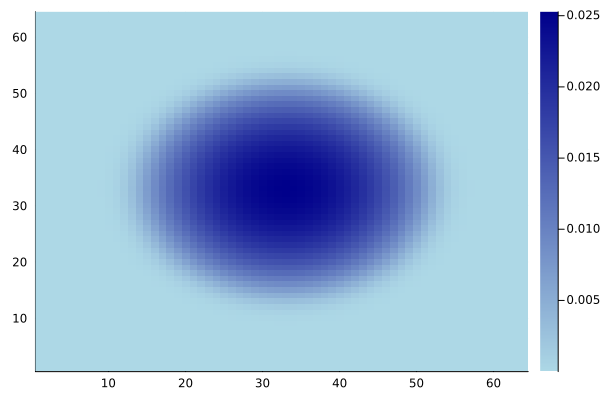

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)